## Multi-class Classifications
- More than two classes as option then its called multi-class classification

In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from tensorflow.keras.utils import plot_model
from sklearn.model_selection import train_test_split
from tensorflow.keras.datasets import fashion_mnist

### Data Set
- This is a dataset of 60,000 28x28 grayscale images of 10 fashion categories, along with a test set of 10,000 images. 
- This dataset can be used as a drop-in replacement for MNIST.

In [2]:
(train_data,train_labels),(test_data,test_labels) = fashion_mnist.load_data()

=== shapes of train and test data/labels
(60000, 28, 28) (60000,) (10000, 28, 28) (10000,)
=== shapes of single data and value of single label
(28, 28) 9
=== Visalize single data as image


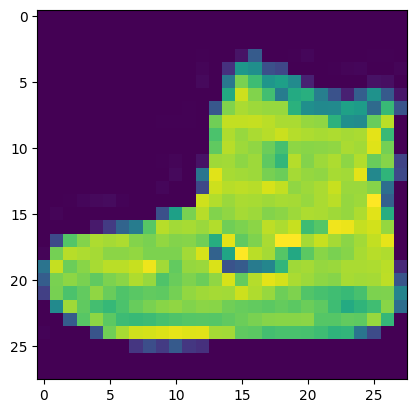

In [3]:
print('=== shapes of train and test data/labels')
print(train_data.shape,train_labels.shape,test_data.shape,test_labels.shape)
print('=== shapes of single data and value of single label')
print(train_data[0].shape, train_labels[0])
print('=== Visalize single data as image')
plt.imshow(train_data[0])

Text(0.5, 1.0, '\tCoat')

D:\Workshops\Python_Worksop\env_data_science\Lib\site-packages\IPython\core\events.py:82: UserWarning: Glyph 9 (	) missing from font(s) DejaVu Sans.
  func(*args, **kwargs)
D:\Workshops\Python_Worksop\env_data_science\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 9 (	) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


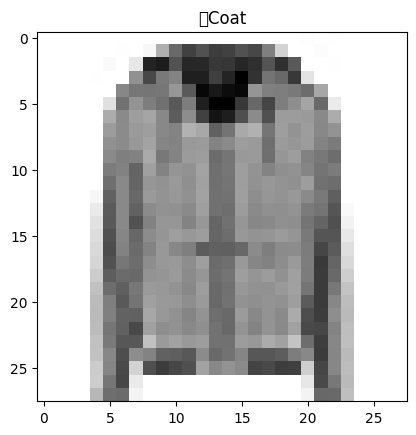

In [4]:
# Visualize with tiele
class_names = ['T-shirt/top','Trouser','Pullover','Dress','	Coat','	Sandal','Shirt','Sneaker','	Bag','Ankle boot']
data_no = 28
plt.imshow(train_data[data_no],cmap=plt.cm.binary)
plt.title(class_names[train_labels[data_no]])


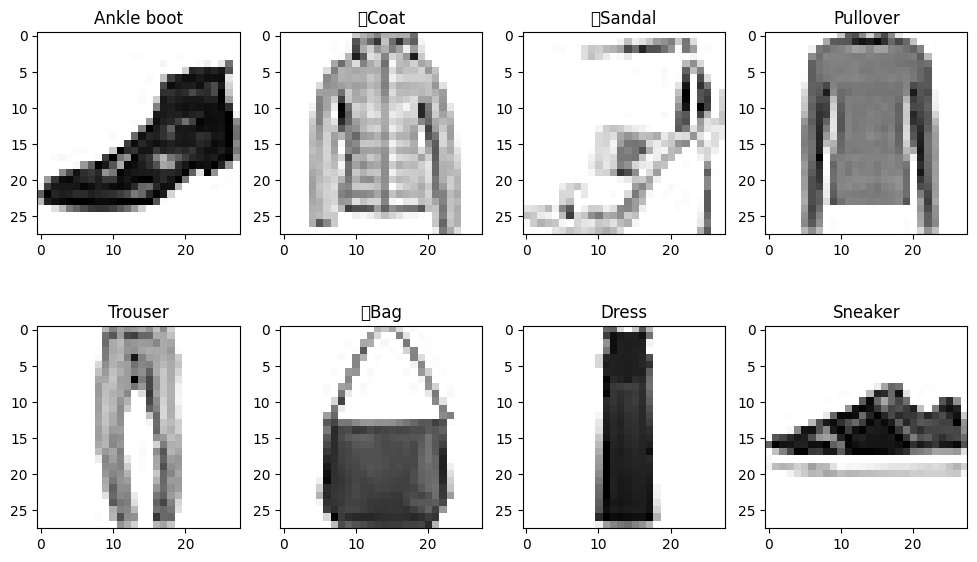

In [5]:
import random
plt.figure(figsize=(12,7))
for i in range(8):
    ax = plt.subplot(2,4,i+1)
    rand_index =random.choice(range(len(train_data)))
    plt.imshow(train_data[rand_index],cmap=plt.cm.binary)
    plt.title(class_names[train_labels[rand_index]])


### Building Multi-class classification Model
- Input Shape = 28 x 28
- Output Shape = 10
- Loss Function 
    = if lebels are one hot encoded then use tf.keras.losses.CategoricalCrossentropy
    = else use tf.keras.losses.SparseCategoricalCrossentropy
- Activaton = softmax

In [7]:
tf.random.set_seed(42)
model_1 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28,28)),
    tf.keras.layers.Dense(4,activation='relu'),
    tf.keras.layers.Dense(4),
    tf.keras.layers.Dense(10,activation=tf.keras.activations.softmax)
])

model_1.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy,
              optimizer=tf.keras.optimizers.Adam(learning_rate=0.01),
              metrics=['accuracy'])

In [8]:
non_norm_hist = model_1.fit(train_data,train_labels,epochs=10,validation_data=(test_data,test_labels))

Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 2ms/step - accuracy: 0.1021 - loss: 7.5357 - val_accuracy: 0.1000 - val_loss: 2.3057
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.1018 - loss: 2.3045 - val_accuracy: 0.1000 - val_loss: 2.3058
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.1016 - loss: 2.3045 - val_accuracy: 0.1000 - val_loss: 2.3057
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.1021 - loss: 2.3045 - val_accuracy: 0.1000 - val_loss: 2.3056
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.1020 - loss: 2.3044 - val_accuracy: 0.1000 - val_loss: 2.3054
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.1029 - loss: 2.3043 - val_accuracy: 0.1000 - val_loss: 2.3051
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.1015 - loss: 2.3042 - val_accuracy: 0.1000 - val_loss: 2.3045
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.1018 - loss: 2.3040 - 

### Improvization of Model
- Normalized Input Data

In [9]:
print('==== Before Normalization range')
print(train_data.min(),train_data.max())
#print(train_data[2])
train_data_norm = train_data/255
test_data_norm = test_data/255
print('==== After Normalization ')
print(train_data_norm.min(),train_data_norm.max())
#print(train_data_norm[2])

==== Before Normalization range
0 255
==== After Normalization 
0.0 1.0


In [10]:
tf.random.set_seed(42)
model_2 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28,28)),
    tf.keras.layers.Dense(4,activation='relu'),
    tf.keras.layers.Dense(4),
    tf.keras.layers.Dense(10,activation=tf.keras.activations.softmax)
])

model_2.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy,
              optimizer=tf.keras.optimizers.Adam(learning_rate=0.01),
              metrics=['accuracy'])

In [11]:
norm_hist = model_2.fit(train_data_norm,train_labels,epochs=10,validation_data=(test_data_norm,test_labels))

Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 12s 3ms/step - accuracy: 0.3102 - loss: 1.5845 - val_accuracy: 0.3339 - val_loss: 1.4959
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.3780 - loss: 1.4253 - val_accuracy: 0.3498 - val_loss: 1.4720
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.3898 - loss: 1.4029 - val_accuracy: 0.3750 - val_loss: 1.4341
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.4017 - loss: 1.3877 - val_accuracy: 0.3859 - val_loss: 1.4271
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.4214 - loss: 1.3628 - val_accuracy: 0.4941 - val_loss: 1.1807
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.4894 - loss: 1.1905 - val_accuracy: 0.4921 - val_loss: 1.1563
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.4960 - loss: 1.1721 - val_accuracy: 0.4920 - val_loss: 1.1535
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.4991 - loss: 1.1662 -

<Axes: title={'center': 'Normalized Data'}>

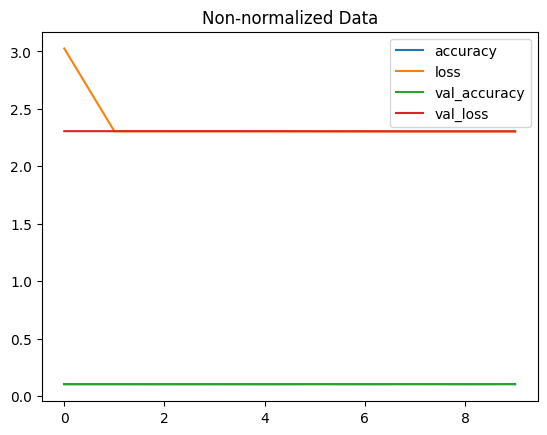

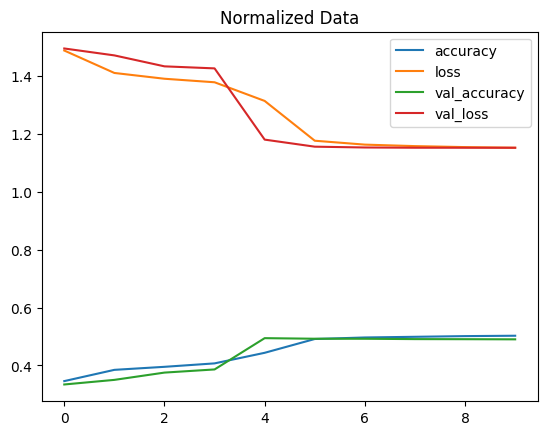

In [12]:
pd.DataFrame(non_norm_hist.history).plot(title= 'Non-normalized Data')
pd.DataFrame(norm_hist.history).plot(title= 'Normalized Data')

#### Improved from 10 % to 50 % by normalizing input data

### Finding best learning rate

In [78]:
tf.random.set_seed(42)
model_3 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28,28)),
    tf.keras.layers.Dense(10,activation='relu'),
    tf.keras.layers.Dense(4),
    tf.keras.layers.Dense(10,activation=tf.keras.activations.softmax)
])

model_3.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy,
              optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
              metrics=['accuracy'])

D:\Workshops\Python_Worksop\env_data_science\Lib\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [79]:
norm_hist = model_3.fit(train_data_norm,train_labels,epochs=10,validation_data=(test_data_norm,test_labels))

Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 15s 3ms/step - accuracy: 0.6308 - loss: 1.0904 - val_accuracy: 0.7951 - val_loss: 0.5992
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.8088 - loss: 0.5624 - val_accuracy: 0.8169 - val_loss: 0.5397
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.8249 - loss: 0.5067 - val_accuracy: 0.8239 - val_loss: 0.5131
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.8311 - loss: 0.4795 - val_accuracy: 0.8276 - val_loss: 0.4992
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.8370 - loss: 0.4623 - val_accuracy: 0.8308 - val_loss: 0.4922
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.8400 - loss: 0.4499 - val_accuracy: 0.8320 - val_loss: 0.4875
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - accuracy: 0.8439 - loss: 0.4410 - val_accuracy: 0.8334 - val_loss: 0.4845
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.8452 - loss: 0.4341 

### Predictions

In [80]:
pred_output = model_3.predict(test_data_norm)


313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


In [81]:
pred_output[2],pred_output[2].argmax(),class_names[pred_output[2].argmax()]

(array([7.928838e-10, 9.996308e-01, 1.209085e-04, 1.445160e-06,
        9.359783e-08, 2.461270e-04, 4.412796e-09, 5.379216e-13,
        1.464936e-12, 7.272704e-07], dtype=float32),
 1,
 'Trouser')

### Confuion Matrix ?

### Visualize Prediction ?

### What Pattern is Model Learning ?

In [82]:
weights, biases = model_3.layers[1].get_weights()
weights.shape,biases.shape

((784, 10), (10,))

In [77]:
biases

array([-0.02667317,  0.7919858 ,  0.4485383 ,  0.22158729], dtype=float32)

In [86]:
model_3.summary()

Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ flatten_4 (Flatten)                  │ (None, 784)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_12 (Dense)                     │ (None, 10)                  │           7,850 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_13 (Dense)                     │ (None, 4)                   │              44 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_14 (Dense)                     │ (None, 10)                  │              50 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 23,834 (93.11 KB)

 Trainable params: 7,944 (31.03 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 15,890 (62.07 KB)